In [1]:
## TCC2 - KNEARST NEIGHBORS

import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
import spotipy

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/joaovmeloc/TCC/main/topmusicas.csv", sep = ";", decimal= ",")
dados.head() 

,id,artista,musica,generos,genero_principal,album,key,duracao,popularidade,acustico,discurso,vivacidade,instrumentalidade,energia,tempo,time_signature,sonoridade,dancabilidade,valencia
0,0xSfELjbi6QwmprLDu4Nrx,The Neighbourhood,#icanteven (feat. French Montana),"modern alternative rock, modern rock, pop, shi...",Rock,#000000 & #FFFFFF,Fs,234480.0,61,0.1140,0.146,0.0787,0.000019,0.625,111.866,4,-9.387,0.359,0.154
1,5dkZ2DrcPJrqwlRQe6Q35e,XXXTENTACION,#PROUDCATOWNERREMIX,"emo rap, miami hip hop",HipHop,#PROUDCATOWNERREMIX,Cs,157293.0,50,0.0287,0.390,0.1270,0.000041,0.522,145.127,4,-6.229,0.783,0.235
2,1HOlb9rdNOmy9b1Fakicjo,The Chainsmokers,#SELFIE,"dance pop, edm, electropop, pop, pop dance, tr...",Pop,#SELFIE,C,183750.0,60,0.0135,0.249,0.0770,0.000008,0.916,127.956,4,-3.262,0.789,0.658
3,65u1dHQyQyE4y4aN2eDmMF,XXXTENTACION,$$$ - with Matt Ox,"emo rap, miami hip hop",HipHop,?,Cs,130403.0,59,0.0636,0.065,0.1380,0.000000,0.507,140.067,4,-6.952,0.774,0.508
4,1CUmDIdhiRGCVFNWDAZ4uo,Sfera Ebbasta,$€ Freestyle,"italian hip hop, italian pop, trap italiana, t...",Pop,Famoso,Gs,164468.0,46,0.2000,0.335,0.3760,0.000000,0.670,136.079,4,-8.661,0.813,0.380


In [3]:
# musica
dados['musica'] = dados['musica'].astype(str)
[musica for musica in dados['musica'] if "evil" in musica.lower()]

['Dancing With The Devil',
 'Devil by the Window',
 'Devil Eyes',
 'RAP DEVIL',
 "Runnin' with the Devil - 2015 Remaster",
 'The Devil in I']

In [4]:
# Variáveis Dummies

dados['time_signature'] = dados['time_signature'].astype(str)

ddummies = pd.get_dummies(dados[['genero_principal','key', 'popularidade', 'acustico', 'discurso',
                     'vivacidade', 'instrumentalidade', 'energia', 'tempo', 'time_signature', 'sonoridade', 'dancabilidade', 'valencia']])

ddummies.head()

,popularidade,acustico,discurso,vivacidade,instrumentalidade,energia,tempo,sonoridade,dancabilidade,valencia,...,key_Ds,key_E,key_F,key_Fs,key_G,key_Gs,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,61,0.1140,0.146,0.0787,0.000019,0.625,111.866,-9.387,0.359,0.154,...,False,False,False,True,False,False,False,False,True,False
1,50,0.0287,0.390,0.1270,0.000041,0.522,145.127,-6.229,0.783,0.235,...,False,False,False,False,False,False,False,False,True,False
2,60,0.0135,0.249,0.0770,0.000008,0.916,127.956,-3.262,0.789,0.658,...,False,False,False,False,False,False,False,False,True,False
3,59,0.0636,0.065,0.1380,0.000000,0.507,140.067,-6.952,0.774,0.508,...,False,False,False,False,False,False,False,False,True,False
4,46,0.2000,0.335,0.3760,0.000000,0.670,136.079,-8.661,0.813,0.380,...,False,False,False,False,False,True,False,False,True,False


In [5]:
# padronizar 

import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dadospadronizados = pd.DataFrame(scaler.fit_transform(ddummies), columns=ddummies.columns)
dadospadronizados.head()

,popularidade,acustico,discurso,vivacidade,instrumentalidade,energia,tempo,sonoridade,dancabilidade,valencia,...,key_Ds,key_E,key_F,key_Fs,key_G,key_Gs,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.116505,-0.445283,0.158710,-0.734745,-0.178335,-0.089044,-0.349417,-1.118117,-2.064279,-1.439030,...,-0.160168,-0.265843,-0.299823,3.501733,-0.317838,-0.303194,-0.069146,-0.212152,0.26479,-0.134202
1,-0.807869,-0.790455,2.214826,-0.396691,-0.178095,-0.685287,0.791280,0.083660,0.774921,-1.077927,...,-0.160168,-0.265843,-0.299823,-0.285573,-0.317838,-0.303194,-0.069146,-0.212152,0.26479,-0.134202
2,0.032471,-0.851963,1.026661,-0.746644,-0.178452,1.595486,0.202395,1.212752,0.815098,0.807834,...,-0.160168,-0.265843,-0.299823,-0.285573,-0.317838,-0.303194,-0.069146,-0.212152,0.26479,-0.134202
3,-0.051563,-0.649230,-0.523853,-0.319702,-0.178540,-0.772119,0.617745,-0.191478,0.714655,0.139125,...,-0.160168,-0.265843,-0.299823,-0.285573,-0.317838,-0.303194,-0.069146,-0.212152,0.26479,-0.134202
4,-1.144005,-0.097278,1.751357,1.346073,-0.178540,0.171450,0.480976,-0.841838,0.975807,-0.431508,...,-0.160168,-0.265843,-0.299823,-0.285573,-0.317838,3.298221,-0.069146,-0.212152,0.26479,-0.134202


In [6]:
# juntando as variaveis dummies com os nomes das musicas e dos artistas

dados2 = dados[['id','musica']]
musicas = pd.concat([dados2, dadospadronizados], axis=1)
colunas_para_dropar = ['id', 'musica']
musicas.set_index(dados.id,inplace=True)
musicas.drop(columns= colunas_para_dropar,inplace=True)
musicas.head()


,popularidade,acustico,discurso,vivacidade,instrumentalidade,energia,tempo,sonoridade,dancabilidade,valencia,...,key_Ds,key_E,key_F,key_Fs,key_G,key_Gs,time_signature_1,time_signature_3,time_signature_4,time_signature_5
id,,,,,,,,,,,,,,,,,,,,,
0xSfELjbi6QwmprLDu4Nrx,0.116505,-0.445283,0.158710,-0.734745,-0.178335,-0.089044,-0.349417,-1.118117,-2.064279,-1.439030,...,-0.160168,-0.265843,-0.299823,3.501733,-0.317838,-0.303194,-0.069146,-0.212152,0.26479,-0.134202
5dkZ2DrcPJrqwlRQe6Q35e,-0.807869,-0.790455,2.214826,-0.396691,-0.178095,-0.685287,0.791280,0.083660,0.774921,-1.077927,...,-0.160168,-0.265843,-0.299823,-0.285573,-0.317838,-0.303194,-0.069146,-0.212152,0.26479,-0.134202
1HOlb9rdNOmy9b1Fakicjo,0.032471,-0.851963,1.026661,-0.746644,-0.178452,1.595486,0.202395,1.212752,0.815098,0.807834,...,-0.160168,-0.265843,-0.299823,-0.285573,-0.317838,-0.303194,-0.069146,-0.212152,0.26479,-0.134202
65u1dHQyQyE4y4aN2eDmMF,-0.051563,-0.649230,-0.523853,-0.319702,-0.178540,-0.772119,0.617745,-0.191478,0.714655,0.139125,...,-0.160168,-0.265843,-0.299823,-0.285573,-0.317838,-0.303194,-0.069146,-0.212152,0.26479,-0.134202
1CUmDIdhiRGCVFNWDAZ4uo,-1.144005,-0.097278,1.751357,1.346073,-0.178540,0.171450,0.480976,-0.841838,0.975807,-0.431508,...,-0.160168,-0.265843,-0.299823,-0.285573,-0.317838,3.298221,-0.069146,-0.212152,0.26479,-0.134202


In [7]:
modelo = NearestNeighbors(n_neighbors=30).fit(musicas)


In [8]:
semelhantes1 = modelo.kneighbors(np.array(musicas.loc["0xSfELjbi6QwmprLDu4Nrx"]).reshape(1, -1),return_distance=False)[0]

c:\Users\Joao victor melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [9]:
semelhantes2 = modelo.kneighbors(np.array(musicas.loc["5dkZ2DrcPJrqwlRQe6Q35e"]).reshape(1, -1),return_distance=False)[0]

c:\Users\Joao victor melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [10]:
semelhantes3 = modelo.kneighbors(np.array(musicas.loc["1HOlb9rdNOmy9b1Fakicjo"]).reshape(1, -1),return_distance=False)[0]

c:\Users\Joao victor melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [11]:
playlist1  = dados.iloc[semelhantes1]
playlist1

,id,artista,musica,generos,genero_principal,album,key,duracao,popularidade,acustico,discurso,vivacidade,instrumentalidade,energia,tempo,time_signature,sonoridade,dancabilidade,valencia
0,0xSfELjbi6QwmprLDu4Nrx,The Neighbourhood,#icanteven (feat. French Montana),"modern alternative rock, modern rock, pop, shi...",Rock,#000000 & #FFFFFF,Fs,234480.0,61,0.114000,0.1460,0.0787,0.000019,0.625,111.866,4,-9.387,0.359,0.154
911,0Fao855T3klV3REFRFHRF3,David Bowie,Blackstar,"art rock, classic rock, glam rock, permanent w...",Rock,Blackstar,Fs,597933.0,47,0.206000,0.0317,0.1780,0.059500,0.552,97.980,4,-8.350,0.366,0.114
897,2EoOZnxNgtmZaD8uUmz2nD,Soundgarden,Black Hole Sun,"alternative metal, alternative rock, classic r...",Rock,Superunknown (Deluxe Edition),Fs,318586.0,73,0.000217,0.0410,0.0774,0.000161,0.828,105.435,4,-5.373,0.350,0.147
8165,2bzitsPcImYC6DZWvvLCQi,Imagine Dragons,"Zero - From the Original Motion Picture ""Ralph...","modern rock, rock",Rock,Origins (Deluxe),Fs,210933.0,66,0.000479,0.0325,0.1110,0.001420,0.662,90.011,4,-7.543,0.634,0.244
1953,3lPn81PFyKvXiyHhlkwkQ4,Bring Me The Horizon,Doomed,"melodic metalcore, metalcore, rock, uk metalcore",Rock,That's The Spirit,Fs,274133.0,60,0.001520,0.1370,0.1890,0.000015,0.903,147.159,4,-4.516,0.271,0.220
3741,6Tt1P5CLUrl59oSOTVxON0,Bastille,Joy,"metropopolis, modern rock, pop, pop rock",Rock,Doom Days,Fs,192681.0,56,0.197000,0.1610,0.0778,0.000000,0.923,118.007,4,-4.748,0.555,0.363
2284,1s9xuJxhYM0LdVqksjegcg,Twenty One Pilots,Fairly Local,"modern rock, rock",Rock,Blurryface,Fs,207160.0,58,0.039600,0.0569,0.0840,0.000086,0.723,114.985,4,-5.993,0.715,0.479
7983,1ZyQGXH9dZ4AecevHhKUxi,Bastille,World Gone Mad,"metropopolis, modern rock, pop, pop rock",Rock,World Gone Mad (From Bright: The Album),Fs,195700.0,50,0.283000,0.0336,0.1750,0.000000,0.680,139.843,4,-3.423,0.505,0.362
2153,5sICkBXVmaCQk5aISGR3x1,Metallica,Enter Sandman,"hard rock, metal, old school thrash, rock, thr...",Rock,Metallica,Fs,331266.0,77,0.002130,0.0298,0.0581,0.011400,0.828,123.257,4,-8.691,0.577,0.604
3050,7DD7eSuYSC5xk2ArU62esN,The Beatles,Help! - Remastered 2009,"beatlesque, british invasion, classic rock, me...",Rock,Help! (Remastered),Fs,139560.0,67,0.188000,0.0332,0.0994,0.000000,0.725,95.003,4,-7.576,0.534,0.763


In [12]:
# exportar para excel

playlist1.to_excel('playlist1.xlsx', index=False)

In [13]:
playlist2  = dados.iloc[semelhantes2]
playlist2

,id,artista,musica,generos,genero_principal,album,key,duracao,popularidade,acustico,discurso,vivacidade,instrumentalidade,energia,tempo,time_signature,sonoridade,dancabilidade,valencia
1,5dkZ2DrcPJrqwlRQe6Q35e,XXXTENTACION,#PROUDCATOWNERREMIX,"emo rap, miami hip hop",HipHop,#PROUDCATOWNERREMIX,Cs,157293.0,50,0.02870,0.390,0.1270,0.000041,0.522,145.127,4,-6.229,0.783,0.2350
2756,7cW1wHpSLYgKWzoWlOCPFJ,Lil Baby,Global,"atl hip hop, atl trap, rap, trap",HipHop,Street Gossip,Cs,169826.0,51,0.10600,0.441,0.1130,0.000000,0.565,163.827,4,-6.504,0.672,0.3130
5572,4Z5FyQlevoHoa5FsIVKZju,DaBaby,PRACTICE,"north carolina hip hop, rap, trap",HipHop,BLAME IT ON BABY (DELUXE),Cs,122586.0,62,0.02390,0.349,0.1260,0.000000,0.536,141.964,4,-7.307,0.849,0.3080
929,57tck8MCxkY6tcQC6VhahR,Apache 207,Bläulich,german hip hop,HipHop,Bläulich,Cs,196229.0,57,0.06330,0.357,0.1180,0.000443,0.687,153.959,4,-7.855,0.796,0.2220
551,6Oq4fiDzKaFMU89dTvM24u,Stormzy,Audacity (feat. Headie One),"grime, uk hip hop",HipHop,Heavy Is The Head,Cs,245920.0,57,0.05230,0.444,0.1300,0.000000,0.516,133.939,4,-4.601,0.678,0.1100
7849,5nN8BwAQDJDguq7Dpd3JQQ,Future,Where Ya At (feat. Drake),"atl hip hop, rap, southern hip hop, trap",HipHop,DS2 (Deluxe),Cs,208026.0,62,0.09330,0.338,0.1400,0.000000,0.453,161.997,4,-6.941,0.813,0.1910
5443,0BBaLX0AEwUCmsJyI5eJ6U,Lil Baby,Perfect Timing,"atl hip hop, atl trap, rap, trap",HipHop,It's Only Me,Cs,161221.0,61,0.03490,0.382,0.1330,0.000000,0.492,156.784,4,-7.314,0.643,0.1170
1065,5ZSIExfQuVv69tw5Qw3yDl,21 Savage,break da law,"atl hip hop, rap",HipHop,i am > i was,Cs,177747.0,54,0.04930,0.346,0.2560,0.000000,0.575,141.037,4,-7.823,0.904,0.3590
530,2QgfDF0fQ4sskDthP8MG5w,21 Savage,asmr,"atl hip hop, rap",HipHop,i am > i was,Cs,171713.0,60,0.03990,0.476,0.1170,0.000000,0.543,170.067,4,-7.738,0.840,0.1610
5245,6M1qLtDxfOeBSbM5HnIo54,Lil Yachty,OOPS,"atl hip hop, melodic rap, rap, trap, viral rap",HipHop,Lil Boat 2,Cs,155130.0,43,0.04600,0.326,0.1100,0.000000,0.425,129.996,4,-7.146,0.944,0.1240


In [14]:
# exportar para excel

playlist2.to_excel('playlist2.xlsx', index=False)

In [15]:
playlist3  = dados.iloc[semelhantes3]
playlist3

,id,artista,musica,generos,genero_principal,album,key,duracao,popularidade,acustico,discurso,vivacidade,instrumentalidade,energia,tempo,time_signature,sonoridade,dancabilidade,valencia
2,1HOlb9rdNOmy9b1Fakicjo,The Chainsmokers,#SELFIE,"dance pop, edm, electropop, pop, pop dance, tr...",Pop,#SELFIE,C,183750.0,60,0.01350,0.2490,0.0770,0.000008,0.916,127.956,4,-3.262,0.789,0.658
107,0yyZN5ASdrYu0XYWFzfxUu,Jesse & Joy,3 A.M.,"latin arena pop, latin pop, mexican pop",Pop,3 A.M.,C,183573.0,65,0.01120,0.0879,0.1190,0.000000,0.840,101.990,4,-3.547,0.702,0.624
3211,5N1o6d8zGcSZSeMFkOUQOk,Megan Thee Stallion,Hot Girl Summer (feat. Nicki Minaj & Ty Dolla ...,"dance pop, houston rap, pop, rap, trap queen",Pop,Hot Girl Summer (feat. Nicki Minaj & Ty Dolla ...,C,199427.0,62,0.00485,0.1550,0.2140,0.000002,0.814,98.985,4,-4.568,0.872,0.570
2571,4L6ihclQPu1hqP9r3WNJjQ,Lady Gaga,Free Woman,"art pop, dance pop, pop",Pop,Chromatica,C,191466.0,57,0.02280,0.0781,0.1870,0.000072,0.927,119.006,4,-3.634,0.731,0.478
3702,6JsHgIkMYHcbNtKfsal2Mg,Tory Lanez,Jerry Sprunger (with T-Pain),"canadian hip hop, canadian trap, melodic rap, ...",Pop,Chixtape 5,C,233546.0,60,0.13700,0.2270,0.0905,0.000000,0.746,100.011,4,-5.331,0.760,0.449
5748,63TyoT9Ee03rQxv8xmdJ2l,Machine Gun Kelly,RAP DEVIL,"ohio hip hop, pop, pop rap",Pop,RAP DEVIL,C,286117.0,56,0.21700,0.2270,0.2390,0.000003,0.839,149.951,4,-4.512,0.895,0.756
4870,1yzBGun3xDY7WpHOIP9nNp,Alok,Never Let Me Go,"electro house, pop nacional, slap house",Pop,Never Let Me Go,C,184070.0,61,0.04100,0.0341,0.0680,0.000009,0.835,123.986,4,-3.914,0.726,0.579
3642,6VXzA05dET772n5rGq63Cz,Little Mix,Is Your Love Enough?,"dance pop, girl group, pop, post-teen pop, tal...",Pop,Glory Days (Expanded Edition),C,224600.0,48,0.00637,0.0818,0.1310,0.000001,0.854,105.968,4,-2.757,0.762,0.615
3376,2GISbjz3wIJX7S4iv1XXAy,Axwell /\ Ingrosso,I Love You,"dance pop, edm, electro house, pop, pop dance,...",Pop,More Than You Know,C,190986.0,50,0.30000,0.1500,0.1190,0.000000,0.868,114.895,4,-4.030,0.643,0.710
5916,1ZM8toCOlnfBKJdvR8GqUq,Pusha T,Rock N Roll (feat. Kanye West & Kid Cudi),"alternative hip hop, hip hop, pop rap, rap, so...",Pop,It's Almost Dry,C,233922.0,57,0.05260,0.1910,0.0718,0.000000,0.783,156.141,4,-4.573,0.687,0.359


In [16]:
# exportar para excel

playlist3.to_excel('playlist3.xlsx', index=False)

In [17]:
x1  = musicas.iloc[semelhantes1]
y1  = musicas.iloc[semelhantes2]
z1  = musicas.iloc[semelhantes3]

CLUSTERIZAÇÃO

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

CLUSTER PLAYLIST 1

In [19]:
# Selecione as colunas relevantes para a análise de cluster (pode ser necessário fazer pré-processamento)
x2 = x1[['popularidade', 'acustico', 'discurso', 'vivacidade',
       'instrumentalidade', 'energia', 'tempo', 'sonoridade', 'dancabilidade',
       'valencia']]

x2



,popularidade,acustico,discurso,vivacidade,instrumentalidade,energia,tempo,sonoridade,dancabilidade,valencia
id,,,,,,,,,,
0xSfELjbi6QwmprLDu4Nrx,0.116505,-0.445283,0.158710,-0.734745,-0.178335,-0.089044,-0.349417,-1.118117,-2.064279,-1.439030
0Fao855T3klV3REFRFHRF3,-1.059971,-0.072999,-0.804462,-0.039739,0.461509,-0.511624,-0.825643,-0.723487,-2.017405,-1.617352
2EoOZnxNgtmZaD8uUmz2nD,1.124914,-0.905713,-0.726094,-0.743844,-0.176808,1.086075,-0.569971,0.409411,-2.124545,-1.470236
2bzitsPcImYC6DZWvvLCQi,0.536676,-0.904653,-0.797721,-0.508676,-0.163264,0.125140,-1.098942,-0.416383,-0.222817,-1.037804
3lPn81PFyKvXiyHhlkwkQ4,0.032471,-0.900440,0.082870,0.037250,-0.178378,1.520232,0.860968,0.735542,-2.653546,-1.144798
6Tt1P5CLUrl59oSOTVxON0,-0.303665,-0.109418,0.285111,-0.741045,-0.178540,1.636008,-0.138810,0.647254,-0.751819,-0.507295
1s9xuJxhYM0LdVqksjegcg,-0.135597,-0.746347,-0.592109,-0.697650,-0.177618,0.478255,-0.242450,0.173470,0.319577,0.009841
1ZyQGXH9dZ4AecevHhKUxi,-0.807869,0.238587,-0.788452,-0.060737,-0.178540,0.229338,0.610063,1.151483,-1.086630,-0.511753
5sICkBXVmaCQk5aISGR3x1,1.461050,-0.897972,-0.820473,-0.878926,-0.055908,1.086075,0.041241,-0.853255,-0.604502,0.567099


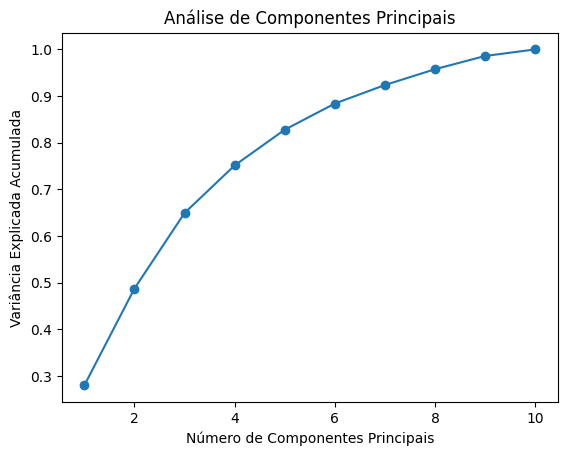

In [20]:
# PCA 

# Criar o objeto PCA
pca = PCA()

# Ajustar o modelo aos dados
componentes_principais = pca.fit_transform(x2)

# Variância explicada por cada componente principal
variancia_explicada_ratio = pca.explained_variance_ratio_

# Plotar a variância explicada acumulada
variancia_acumulada = np.cumsum(variancia_explicada_ratio)
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Análise de Componentes Principais')
plt.show()

In [21]:
x3 = x2[['energia', 'sonoridade', 'acustico', 'valencia']]

x3

,energia,sonoridade,acustico,valencia
id,,,,
0xSfELjbi6QwmprLDu4Nrx,-0.089044,-1.118117,-0.445283,-1.439030
0Fao855T3klV3REFRFHRF3,-0.511624,-0.723487,-0.072999,-1.617352
2EoOZnxNgtmZaD8uUmz2nD,1.086075,0.409411,-0.905713,-1.470236
2bzitsPcImYC6DZWvvLCQi,0.125140,-0.416383,-0.904653,-1.037804
3lPn81PFyKvXiyHhlkwkQ4,1.520232,0.735542,-0.900440,-1.144798
6Tt1P5CLUrl59oSOTVxON0,1.636008,0.647254,-0.109418,-0.507295
1s9xuJxhYM0LdVqksjegcg,0.478255,0.173470,-0.746347,0.009841
1ZyQGXH9dZ4AecevHhKUxi,0.229338,1.151483,0.238587,-0.511753
5sICkBXVmaCQk5aISGR3x1,1.086075,-0.853255,-0.897972,0.567099


In [22]:
# Aplicar o algoritmo K-means
kmeans1 = KMeans(n_clusters=3, random_state=0).fit(x3)
kmeans1.labels_

c:\Users\Joao victor melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 2, 0, 0, 0, 1, 1])

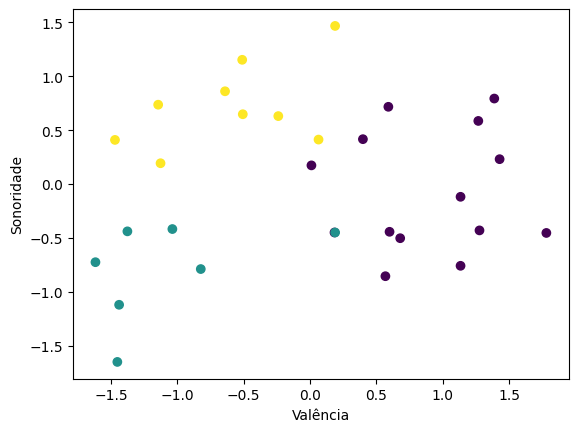

In [23]:
# gráfico da playlist

fig, ax = plt.subplots()
ax.scatter(x3["valencia"], x3["sonoridade"], c = kmeans1.labels_)
plt.xlabel('Valência')
plt.ylabel('Sonoridade')
plt.show()



array([[<Axes: xlabel='energia', ylabel='energia'>,
        <Axes: xlabel='sonoridade', ylabel='energia'>,
        <Axes: xlabel='acustico', ylabel='energia'>,
        <Axes: xlabel='valencia', ylabel='energia'>],
       [<Axes: xlabel='energia', ylabel='sonoridade'>,
        <Axes: xlabel='sonoridade', ylabel='sonoridade'>,
        <Axes: xlabel='acustico', ylabel='sonoridade'>,
        <Axes: xlabel='valencia', ylabel='sonoridade'>],
       [<Axes: xlabel='energia', ylabel='acustico'>,
        <Axes: xlabel='sonoridade', ylabel='acustico'>,
        <Axes: xlabel='acustico', ylabel='acustico'>,
        <Axes: xlabel='valencia', ylabel='acustico'>],
       [<Axes: xlabel='energia', ylabel='valencia'>,
        <Axes: xlabel='sonoridade', ylabel='valencia'>,
        <Axes: xlabel='acustico', ylabel='valencia'>,
        <Axes: xlabel='valencia', ylabel='valencia'>]], dtype=object)

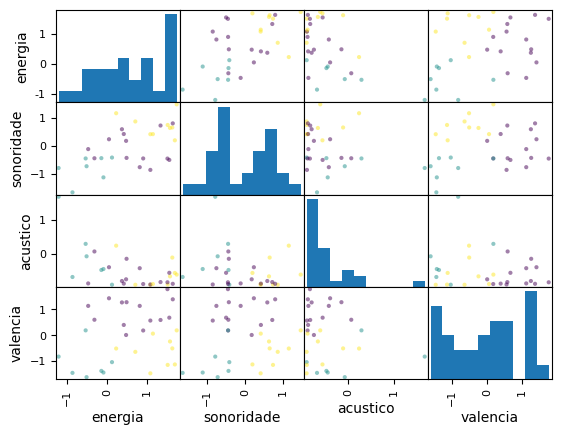

In [24]:
pd.plotting.scatter_matrix(x3, c=kmeans1.labels_)

CLUSTER PLAYLIST 2

In [25]:
# Selecione as colunas relevantes para a análise de cluster (pode ser necessário fazer pré-processamento)
y2 = y1[['popularidade', 'acustico', 'discurso', 'vivacidade',
       'instrumentalidade', 'energia', 'tempo', 'sonoridade', 'dancabilidade',
       'valencia']]

y2

,popularidade,acustico,discurso,vivacidade,instrumentalidade,energia,tempo,sonoridade,dancabilidade,valencia
id,,,,,,,,,,
5dkZ2DrcPJrqwlRQe6Q35e,-0.807869,-0.790455,2.214826,-0.396691,-0.178095,-0.685287,0.791280,0.083660,0.774921,-1.077927
7cW1wHpSLYgKWzoWlOCPFJ,-0.723835,-0.477655,2.644588,-0.494678,-0.178540,-0.436370,1.432603,-0.020991,0.031640,-0.730198
4Z5FyQlevoHoa5FsIVKZju,0.200540,-0.809878,1.869331,-0.403690,-0.178540,-0.604245,0.682804,-0.326573,1.216871,-0.752488
57tck8MCxkY6tcQC6VhahR,-0.219631,-0.650444,1.936745,-0.459683,-0.173774,0.269859,1.094176,-0.535115,0.861972,-1.135882
6Oq4fiDzKaFMU89dTvM24u,-0.219631,-0.694956,2.669868,-0.375694,-0.178540,-0.720020,0.407584,0.703195,0.071817,-1.635185
5nN8BwAQDJDguq7Dpd3JQQ,0.200540,-0.529047,1.776638,-0.305703,-0.178540,-1.084712,1.369842,-0.187292,0.975807,-1.274082
0BBaLX0AEwUCmsJyI5eJ6U,0.116505,-0.765366,2.147413,-0.354697,-0.178540,-0.858950,1.191061,-0.329237,-0.162551,-1.603978
5ZSIExfQuVv69tw5Qw3yDl,-0.471733,-0.707096,1.844051,0.506187,-0.178540,-0.378483,0.651012,-0.522937,1.585164,-0.525127
2QgfDF0fQ4sskDthP8MG5w,0.032471,-0.745133,2.939523,-0.466682,-0.178540,-0.563723,1.646606,-0.490590,1.156605,-1.407823


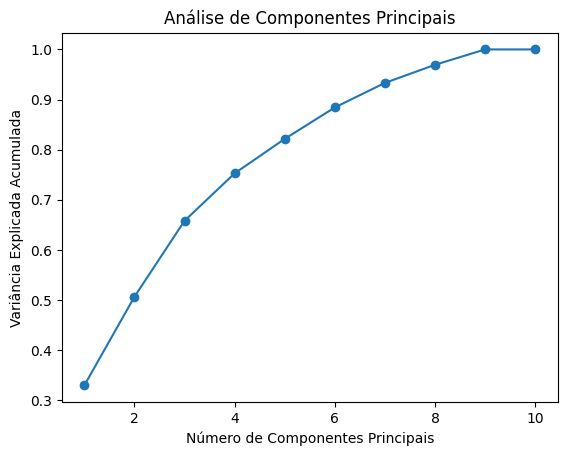

In [26]:
# PCA 

# Criar o objeto PCA
pca = PCA()

# Ajustar o modelo aos dados
componentes_principais = pca.fit_transform(y2)

# Variância explicada por cada componente principal
variancia_explicada_ratio = pca.explained_variance_ratio_

# Plotar a variância explicada acumulada
variancia_acumulada = np.cumsum(variancia_explicada_ratio)
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Análise de Componentes Principais')
plt.show()

In [27]:
y3 = y2[['energia', 'sonoridade', 'acustico', 'valencia']]

y3

,energia,sonoridade,acustico,valencia
id,,,,
5dkZ2DrcPJrqwlRQe6Q35e,-0.685287,0.083660,-0.790455,-1.077927
7cW1wHpSLYgKWzoWlOCPFJ,-0.436370,-0.020991,-0.477655,-0.730198
4Z5FyQlevoHoa5FsIVKZju,-0.604245,-0.326573,-0.809878,-0.752488
57tck8MCxkY6tcQC6VhahR,0.269859,-0.535115,-0.650444,-1.135882
6Oq4fiDzKaFMU89dTvM24u,-0.720020,0.703195,-0.694956,-1.635185
5nN8BwAQDJDguq7Dpd3JQQ,-1.084712,-0.187292,-0.529047,-1.274082
0BBaLX0AEwUCmsJyI5eJ6U,-0.858950,-0.329237,-0.765366,-1.603978
5ZSIExfQuVv69tw5Qw3yDl,-0.378483,-0.522937,-0.707096,-0.525127
2QgfDF0fQ4sskDthP8MG5w,-0.563723,-0.490590,-0.745133,-1.407823


In [28]:
# Aplicar o algoritmo K-means
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(y3)
kmeans2.labels_

c:\Users\Joao victor melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1,
       0, 0, 0, 2, 2, 0, 2, 0])

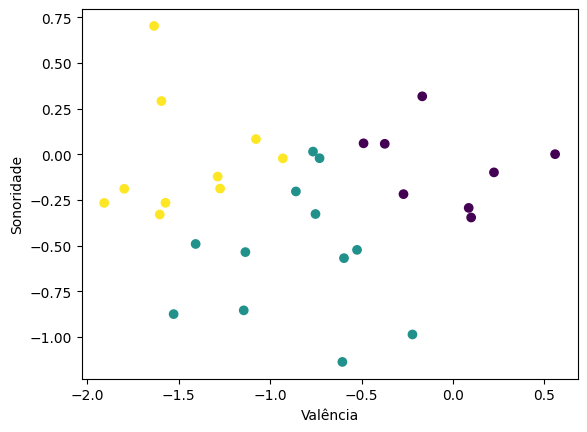

In [29]:
# gráfico da playlist

fig, ax = plt.subplots()
ax.scatter(y3["valencia"], y3["sonoridade"], c = kmeans2.labels_)
plt.xlabel('Valência')
plt.ylabel('Sonoridade')
plt.show()

array([[<Axes: xlabel='energia', ylabel='energia'>,
        <Axes: xlabel='sonoridade', ylabel='energia'>,
        <Axes: xlabel='acustico', ylabel='energia'>,
        <Axes: xlabel='valencia', ylabel='energia'>],
       [<Axes: xlabel='energia', ylabel='sonoridade'>,
        <Axes: xlabel='sonoridade', ylabel='sonoridade'>,
        <Axes: xlabel='acustico', ylabel='sonoridade'>,
        <Axes: xlabel='valencia', ylabel='sonoridade'>],
       [<Axes: xlabel='energia', ylabel='acustico'>,
        <Axes: xlabel='sonoridade', ylabel='acustico'>,
        <Axes: xlabel='acustico', ylabel='acustico'>,
        <Axes: xlabel='valencia', ylabel='acustico'>],
       [<Axes: xlabel='energia', ylabel='valencia'>,
        <Axes: xlabel='sonoridade', ylabel='valencia'>,
        <Axes: xlabel='acustico', ylabel='valencia'>,
        <Axes: xlabel='valencia', ylabel='valencia'>]], dtype=object)

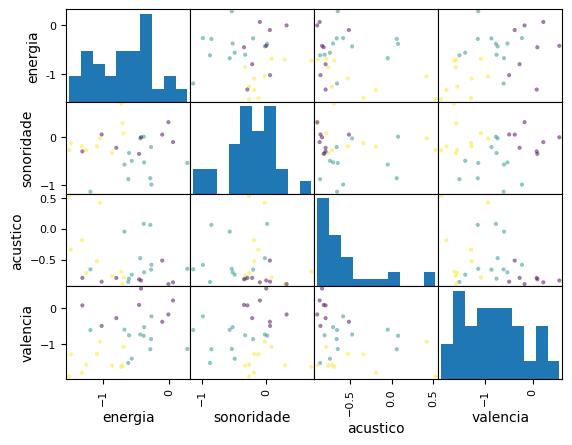

In [30]:
pd.plotting.scatter_matrix(y3, c=kmeans2.labels_)

CLUSTER PLAYLIST 3

In [31]:
# Selecione as colunas relevantes para a análise de cluster (pode ser necessário fazer pré-processamento)
z2 = z1[['popularidade', 'acustico', 'discurso', 'vivacidade',
       'instrumentalidade', 'energia', 'tempo', 'sonoridade', 'dancabilidade',
       'valencia']]

z2

,popularidade,acustico,discurso,vivacidade,instrumentalidade,energia,tempo,sonoridade,dancabilidade,valencia
id,,,,,,,,,,
1HOlb9rdNOmy9b1Fakicjo,0.032471,-0.851963,1.026661,-0.746644,-0.178452,1.595486,0.202395,1.212752,0.815098,0.807834
0yyZN5ASdrYu0XYWFzfxUu,0.452642,-0.861270,-0.330881,-0.452684,-0.178540,1.155540,-0.688118,1.104295,0.232526,0.656260
5N1o6d8zGcSZSeMFkOUQOk,0.200540,-0.886965,0.234550,0.212227,-0.178518,1.005032,-0.791176,0.715754,1.370885,0.415524
4L6ihclQPu1hqP9r3WNJjQ,-0.219631,-0.814330,-0.413463,0.023252,-0.177770,1.659163,-0.104549,1.071187,0.426717,0.005383
6JsHgIkMYHcbNtKfsal2Mg,0.032471,-0.352212,0.841273,-0.652157,-0.178540,0.611396,-0.755989,0.425394,0.620907,-0.123901
63TyoT9Ee03rQxv8xmdJ2l,-0.303665,-0.028487,0.841273,0.387203,-0.178507,1.149751,0.956721,0.737064,1.524898,1.244724
1yzBGun3xDY7WpHOIP9nNp,0.116505,-0.740682,-0.784238,-0.809635,-0.178438,1.126596,0.066242,0.964633,0.393236,0.455647
6VXzA05dET772n5rGq63Cz,-0.975937,-0.880815,-0.382284,-0.368695,-0.178527,1.236583,-0.551691,1.404930,0.634300,0.616137
2GISbjz3wIJX7S4iv1XXAy,-0.807869,0.307378,0.192417,-0.452684,-0.178540,1.317626,-0.245537,0.920489,-0.162551,1.039653


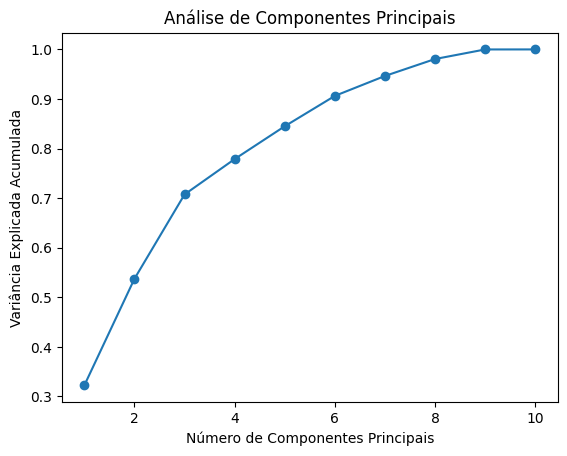

In [32]:
# PCA 

# Criar o objeto PCA
pca = PCA()

# Ajustar o modelo aos dados
componentes_principais = pca.fit_transform(z2)

# Variância explicada por cada componente principal
variancia_explicada_ratio = pca.explained_variance_ratio_

# Plotar a variância explicada acumulada
variancia_acumulada = np.cumsum(variancia_explicada_ratio)
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Análise de Componentes Principais')
plt.show()

In [33]:
z3 = z2[['energia', 'sonoridade', 'acustico', 'valencia']]

z3

,energia,sonoridade,acustico,valencia
id,,,,
1HOlb9rdNOmy9b1Fakicjo,1.595486,1.212752,-0.851963,0.807834
0yyZN5ASdrYu0XYWFzfxUu,1.155540,1.104295,-0.861270,0.656260
5N1o6d8zGcSZSeMFkOUQOk,1.005032,0.715754,-0.886965,0.415524
4L6ihclQPu1hqP9r3WNJjQ,1.659163,1.071187,-0.814330,0.005383
6JsHgIkMYHcbNtKfsal2Mg,0.611396,0.425394,-0.352212,-0.123901
63TyoT9Ee03rQxv8xmdJ2l,1.149751,0.737064,-0.028487,1.244724
1yzBGun3xDY7WpHOIP9nNp,1.126596,0.964633,-0.740682,0.455647
6VXzA05dET772n5rGq63Cz,1.236583,1.404930,-0.880815,0.616137
2GISbjz3wIJX7S4iv1XXAy,1.317626,0.920489,0.307378,1.039653


In [34]:
# Aplicar o algoritmo K-means
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(z3)
kmeans3.labels_

c:\Users\Joao victor melo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0,
       1, 0, 2, 0, 0, 2, 0, 2])

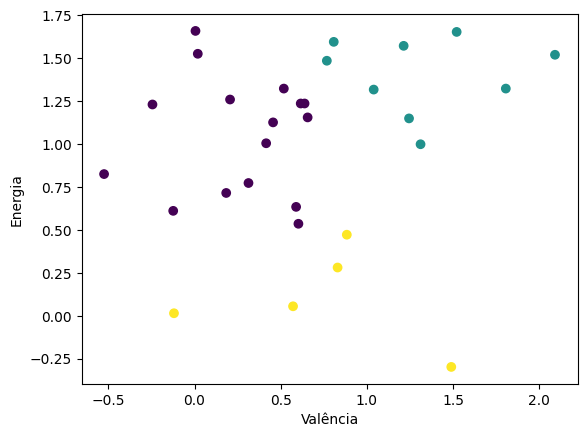

In [35]:
# gráfico da playlist

fig, ax = plt.subplots()
ax.scatter(z3["valencia"], z3["energia"], c = kmeans3.labels_)
plt.xlabel('Valência')
plt.ylabel('Energia')
plt.show()

array([[<Axes: xlabel='energia', ylabel='energia'>,
        <Axes: xlabel='sonoridade', ylabel='energia'>,
        <Axes: xlabel='acustico', ylabel='energia'>,
        <Axes: xlabel='valencia', ylabel='energia'>],
       [<Axes: xlabel='energia', ylabel='sonoridade'>,
        <Axes: xlabel='sonoridade', ylabel='sonoridade'>,
        <Axes: xlabel='acustico', ylabel='sonoridade'>,
        <Axes: xlabel='valencia', ylabel='sonoridade'>],
       [<Axes: xlabel='energia', ylabel='acustico'>,
        <Axes: xlabel='sonoridade', ylabel='acustico'>,
        <Axes: xlabel='acustico', ylabel='acustico'>,
        <Axes: xlabel='valencia', ylabel='acustico'>],
       [<Axes: xlabel='energia', ylabel='valencia'>,
        <Axes: xlabel='sonoridade', ylabel='valencia'>,
        <Axes: xlabel='acustico', ylabel='valencia'>,
        <Axes: xlabel='valencia', ylabel='valencia'>]], dtype=object)

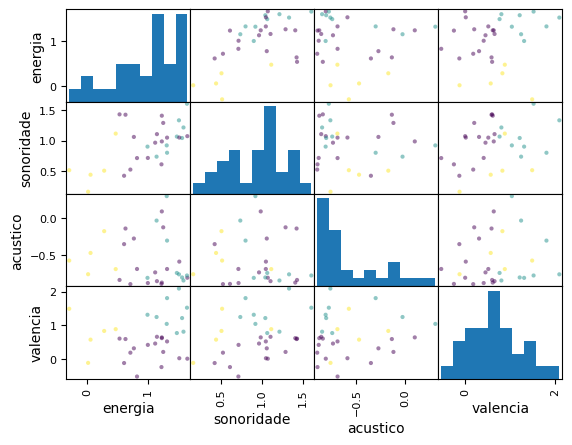

In [36]:
pd.plotting.scatter_matrix(z3, c=kmeans3.labels_)